In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Laguerre

""" Analytical derivation of amplification fidelities"""

def beta_opt(alpha,n):
    return alpha/2 * (1 + np.sqrt(1 + 4*n/abs(alpha)**2))


L1 = Laguerre([0, 1, 0])
L2 = Laguerre([0, 0, 1])

def gain1(alpha):
    return (2+np.abs(alpha)**2)/(1+np.abs(alpha)**2)

def gain2(alpha):
    return (6+6*np.abs(alpha)**2+np.abs(alpha)**4)/(2+4*np.abs(alpha)**2+np.abs(alpha)**4)

def fid_n1(alpha):
    n=1
    beta = alpha*gain1(alpha)
    return np.abs(beta)**(2*n)/L1(-np.abs(alpha)**2)*np.exp(-np.abs(alpha-beta)**2)

def fid_n1_opt(alpha):
    n=1
    return np.abs(beta_opt(alpha,1))**(2*n)/L1(-np.abs(alpha)**2)*np.exp(-np.abs(alpha-beta_opt(alpha,1))**2)

def fid_n2(alpha):
    n=2
    beta = alpha*gain2(alpha)
    return np.abs(beta)**(2*n)/L2(-np.abs(alpha)**2)/2*np.exp(-np.abs(alpha-beta)**2)

def fid_n2_opt(alpha):
    n=2
    return np.abs(beta_opt(alpha,n))**(2*n)/L2(-np.abs(alpha)**2)/2*np.exp(-np.abs(alpha-beta_opt(alpha,n))**2)

In [2]:
alphas = np.arange(0,2.01,0.01)

data1 = np.loadtxt(r"Data_points\Fig5_a.txt")
data2 = np.loadtxt(r"Data_points\Fig5_b.txt")

In [4]:
plt_width=4
plt_ratio=0.75

fontsize = 22
markersize = 6
capsize=0
err_lw=1.4
lw=1.3
var_scale=1
DPI = 150

color1=(108/255,35/255,244/255,1)
color2=(230/255,52/255,81/255,1)
color3=(37/255,87/255,243/255,1)

# Plotting fidelity of amplification

C:\Users\Jiří Fadrný\AppData\Local\Temp\ipykernel_4592\2738663935.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return alpha/2 * (1 + np.sqrt(1 + 4*n/abs(alpha)**2))
C:\Users\Jiří Fadrný\AppData\Local\Temp\ipykernel_4592\2738663935.py:9: RuntimeWarning: invalid value encountered in multiply
  return alpha/2 * (1 + np.sqrt(1 + 4*n/abs(alpha)**2))


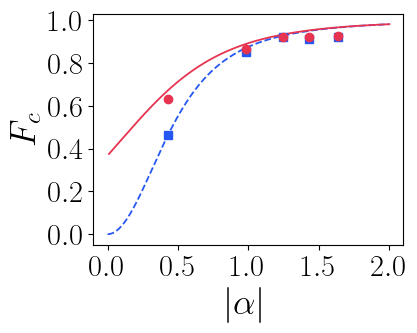

In [7]:
# Empty string will cause the script not to save the figure.
# If you want to save the figure, fill in the file name and the file type (i.e. .png, .svg)
filename = ""

spacs_amplitudes = data1[:,0]
spacs_amp_fidelity = data1[:,1]
spacs_amp_fidelity_std = data1[:,2]
spacs_amp_fidelity2 = data1[:,3]
spacs_amp_fidelity2_std = data1[:,4]

plt.rcParams['text.usetex'] = True

c1=color3
c2=color2

%matplotlib inline
fig,ax = plt.subplots(figsize=(plt_width,plt_width*plt_ratio))

plt.errorbar(spacs_amplitudes,spacs_amp_fidelity, yerr = var_scale*spacs_amp_fidelity_std,
             c=c1,fmt ='s',markersize=markersize,capsize=capsize,lw=err_lw)

plt.errorbar(spacs_amplitudes,spacs_amp_fidelity2, yerr = var_scale*spacs_amp_fidelity2_std,
             c=c2,fmt ='o',markersize=markersize,capsize=capsize,lw=err_lw)

plt.plot(alphas,fid_n1(alphas),"--",label = "",c=c1,linewidth=lw)
plt.plot(alphas,fid_n1_opt(alphas),"-",label = "",c=c2,linewidth=lw)
plt.ylabel(r'$F_{c}$',fontsize = fontsize+4)
plt.xlabel(r'$\vert \alpha \vert$',fontsize = fontsize+4)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.legend()
if filename != "":
    plt.savefig(filename, dpi=DPI, bbox_inches = 'tight')

C:\Users\Jiří Fadrný\AppData\Local\Temp\ipykernel_4592\2738663935.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return alpha/2 * (1 + np.sqrt(1 + 4*n/abs(alpha)**2))
C:\Users\Jiří Fadrný\AppData\Local\Temp\ipykernel_4592\2738663935.py:9: RuntimeWarning: invalid value encountered in multiply
  return alpha/2 * (1 + np.sqrt(1 + 4*n/abs(alpha)**2))


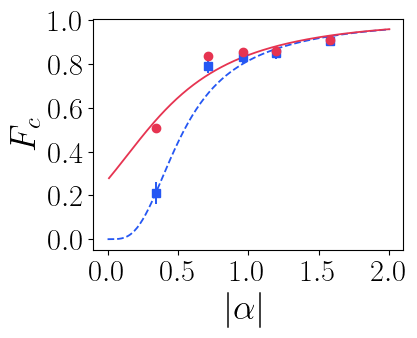

In [9]:
# Empty string will cause the script not to save the figure.
# If you want to save the figure, fill in the file name and the file type (i.e. .png, .svg)
filename = ""

tpacs_amplitudes = data2[:,0]
tpacs_amp_fidelity = data2[:,1]
tpacs_amp_fidelity_std = data2[:,2]
tpacs_amp_fidelity2 = data2[:,3]
tpacs_amp_fidelity2_std = data2[:,4]

plt.rcParams['text.usetex'] = True

c1=color3
c2=color2

%matplotlib inline
fig,ax = plt.subplots(figsize=(plt_width,plt_width*plt_ratio))

plt.errorbar(tpacs_amplitudes,tpacs_amp_fidelity, yerr = var_scale*tpacs_amp_fidelity_std,
             c=c1,fmt ='s',markersize=markersize,capsize=capsize,lw=err_lw)

plt.errorbar(tpacs_amplitudes,tpacs_amp_fidelity2, yerr = var_scale*tpacs_amp_fidelity2_std,
             c=c2,fmt ='o',markersize=markersize,capsize=capsize,lw=err_lw)

plt.plot(alphas,fid_n2(alphas),"--",label = "",c=c1,linewidth=lw)
plt.plot(alphas,fid_n2_opt(alphas),"-",label = "",c=c2,linewidth=lw)
plt.ylabel(r'$F_{c}$',fontsize = fontsize+4)
plt.xlabel(r'$\vert \alpha \vert$',fontsize = fontsize+4)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.legend()
if filename != "":
    plt.savefig(filename, dpi=DPI, bbox_inches = 'tight')